## <i> ========== Traffic Flow Prediction ==========</i>

#### <i>===== Import Library Files ===== </i>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


####  <i> ========== Dataset Overview ========== </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


#### <i>========== Dataset Preprocessing ========== </i>

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
# 1. Handling missing values
# Impute missing values in the 'holiday' column with 'None' (assuming missing values mean no holiday)
df['holiday'].fillna('None', inplace=True)

In [7]:
# 2. Convert 'date_time' to datetime object and extract new features
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['weekday'] = df['date_time'].dt.weekday

In [8]:
# Drop 'date_time' column as we have extracted useful features
df.drop(columns=['date_time'], inplace=True)


In [9]:
# 3. Encoding categorical features
# Encode 'holiday', 'weather_main', and 'weather_description' using LabelEncoder
label_encoder = LabelEncoder()

df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['weather_main'] = label_encoder.fit_transform(df['weather_main'])
df['weather_description'] = label_encoder.fit_transform(df['weather_description'])

In [10]:
# 4. Scaling numerical features
# Define the numerical columns to scale
numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']


In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the preprocessed data
print(df.head())


   holiday      temp   rain_1h   snow_1h  clouds_all  weather_main  \
0        7  0.530370 -0.007463 -0.027228   -0.239963             1   
1        7  0.611341 -0.007463 -0.027228    0.657120             1   
2        7  0.627836 -0.007463 -0.027228    1.041584             1   
3        7  0.669071 -0.007463 -0.027228    1.041584             1   
4        7  0.744794 -0.007463 -0.027228    0.657120             1   

   weather_description  traffic_volume  hour  day  month  weekday  
0                   24        1.150159     9    2     10        1  
1                    2        0.632251    10    2     10        1  
2                   19        0.758582    11    2     10        1  
3                   19        0.888940    12    2     10        1  
4                    2        0.834582    13    2     10        1  


In [12]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day,month,weekday
0,7,0.530370,-0.007463,-0.027228,-0.239963,1,24,1.150159,9,2,10,1
1,7,0.611341,-0.007463,-0.027228,0.657120,1,2,0.632251,10,2,10,1
2,7,0.627836,-0.007463,-0.027228,1.041584,1,19,0.758582,11,2,10,1
3,7,0.669071,-0.007463,-0.027228,1.041584,1,19,0.888940,12,2,10,1
4,7,0.744794,-0.007463,-0.027228,0.657120,1,2,0.834582,13,2,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,7,0.168250,-0.007463,-0.027228,0.657120,1,2,0.142529,19,30,9,6
48200,7,0.116518,-0.007463,-0.027228,1.041584,1,19,-0.240995,20,30,9,6
48201,7,0.114269,-0.007463,-0.027228,1.041584,10,21,-0.554055,21,30,9,6
48202,7,0.066286,-0.007463,-0.027228,1.041584,1,19,-0.910903,22,30,9,6


#### <i> ========== Expolatory Data Analysis ( EDA ) =========== </i>

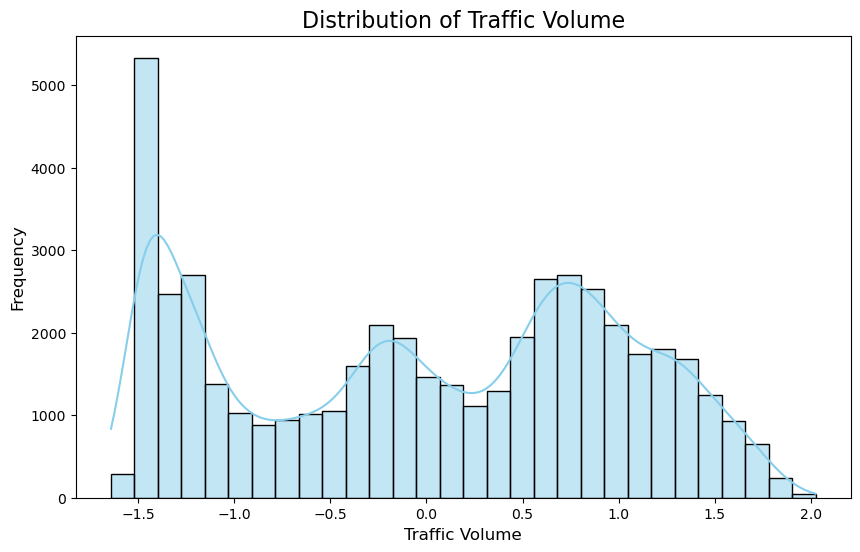

In [13]:
# 1. Distribution of 'traffic_volume'
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Traffic Volume', fontsize=16)
plt.xlabel('Traffic Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

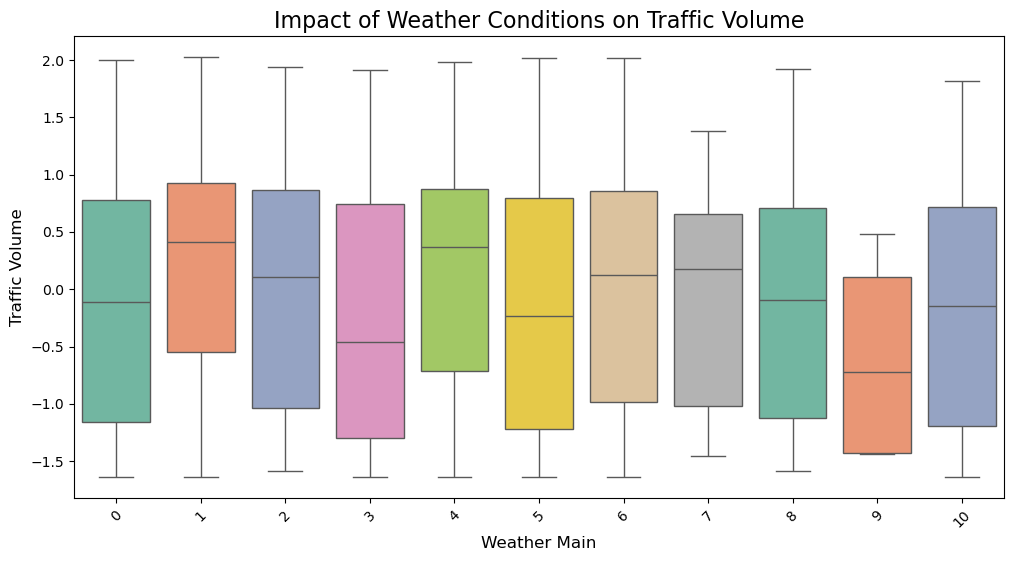

In [14]:
# 4. Traffic volume by weather_main
plt.figure(figsize=(12,6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df, palette='Set2')
plt.title('Impact of Weather Conditions on Traffic Volume', fontsize=16)
plt.xlabel('Weather Main', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.xticks(rotation=45)
plt.show()

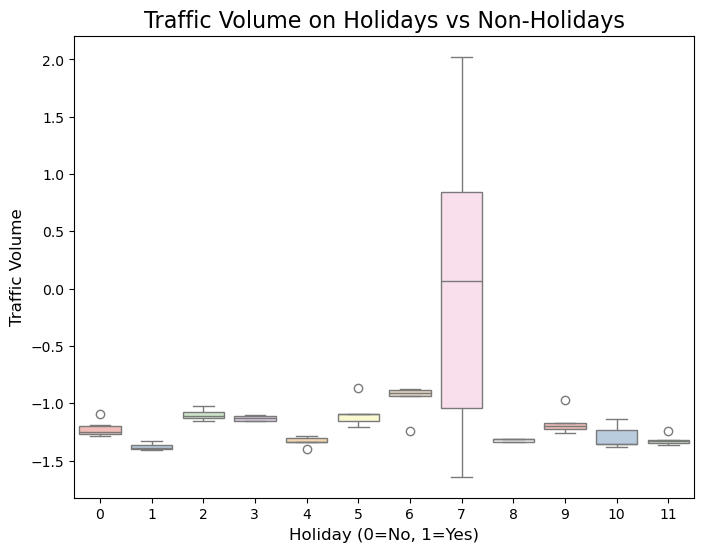

In [15]:
# 5. Holiday vs. Non-Holiday Traffic Volume
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Pastel1')
plt.title('Traffic Volume on Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Holiday (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.show()

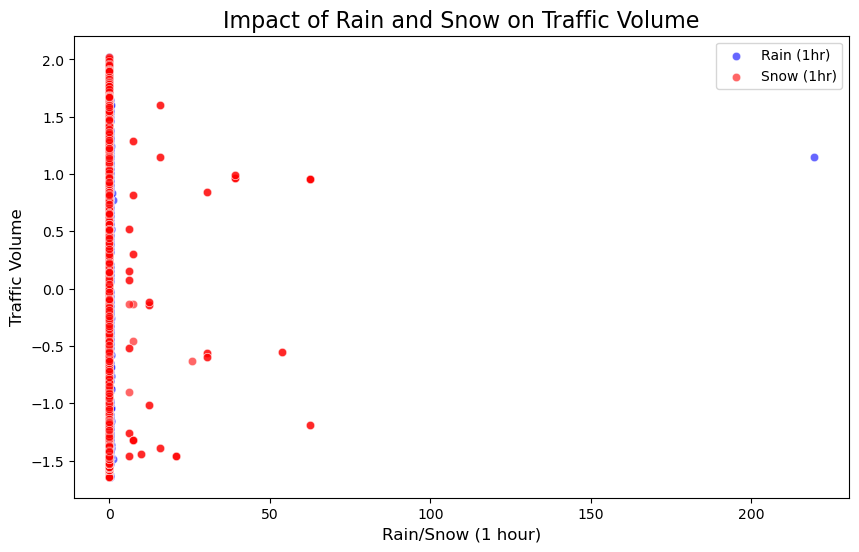

In [16]:
# 6. Rain and snow impact on traffic volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='rain_1h', y='traffic_volume', data=df, label='Rain (1hr)', color='blue', alpha=0.6)
sns.scatterplot(x='snow_1h', y='traffic_volume', data=df, label='Snow (1hr)', color='red', alpha=0.6)
plt.title('Impact of Rain and Snow on Traffic Volume', fontsize=16)
plt.xlabel('Rain/Snow (1 hour)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.legend()
plt.show()

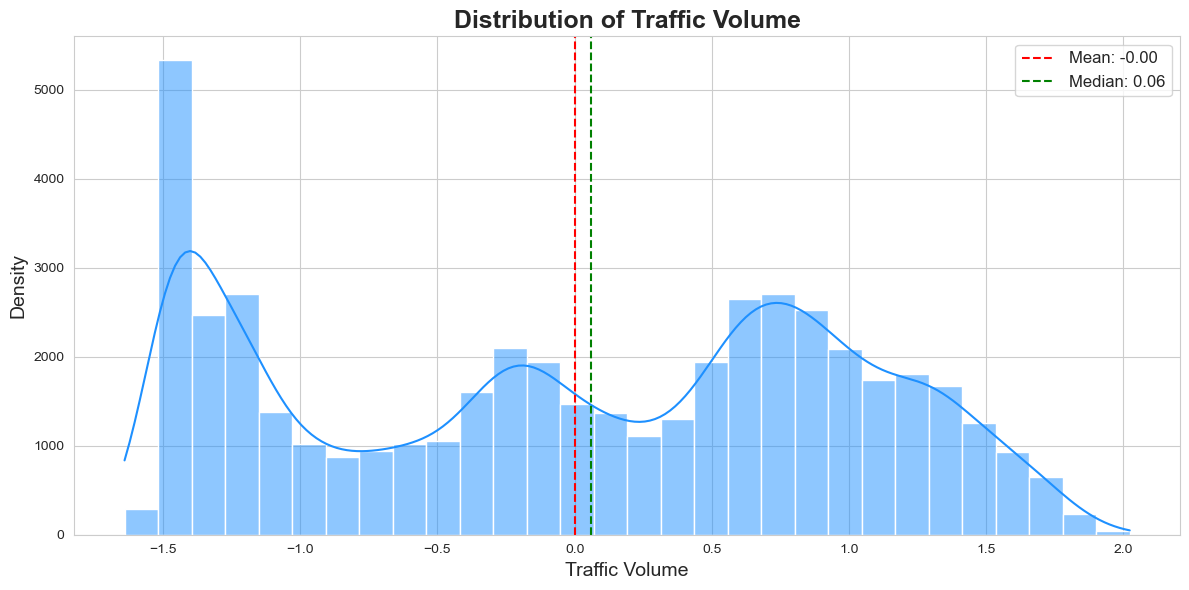

In [17]:
# Set a custom aesthetic for plots
sns.set_style("whitegrid")
sns.set_palette("Set2")

# 1. Distribution of 'traffic_volume' with insights on peak times
plt.figure(figsize=(12,6))
sns.histplot(df['traffic_volume'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribution of Traffic Volume', fontsize=18, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axvline(df['traffic_volume'].mean(), color='red', linestyle='--', label=f'Mean: {df["traffic_volume"].mean():.2f}')
plt.axvline(df['traffic_volume'].median(), color='green', linestyle='--', label=f'Median: {df["traffic_volume"].median():.2f}')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

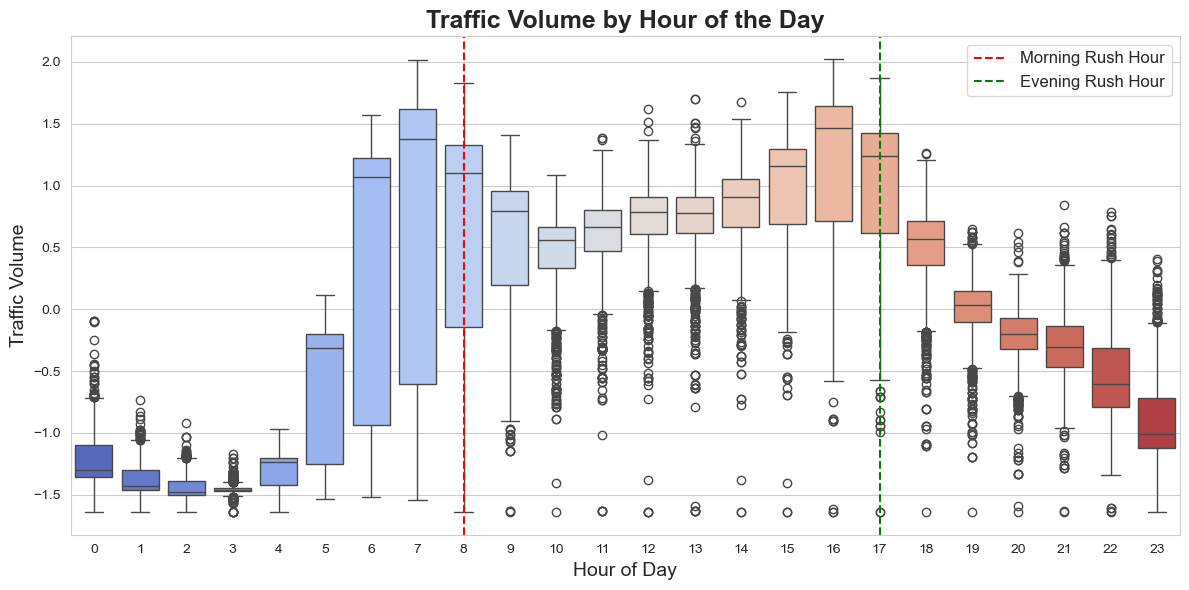

In [18]:
# Insight: Features like temperature and cloud cover have a slight correlation with traffic volume, suggesting weather patterns play a role.

# 3. Traffic volume by hour of the day with rush hour highlights
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='traffic_volume', data=df, palette='coolwarm')
plt.title('Traffic Volume by Hour of the Day', fontsize=18, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.axvline(x=8, color='red', linestyle='--', label='Morning Rush Hour')
plt.axvline(x=17, color='green', linestyle='--', label='Evening Rush Hour')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

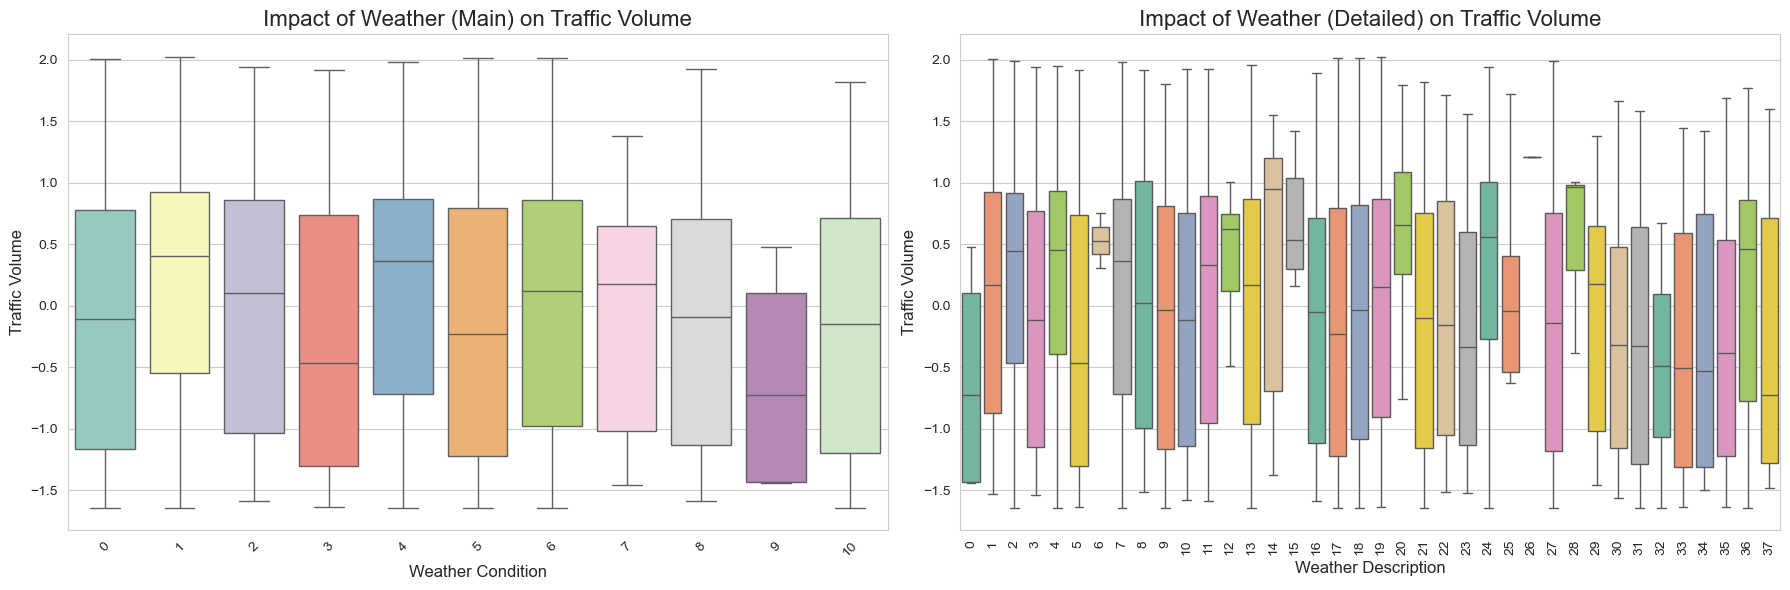

In [19]:
# 4. Impact of weather conditions on traffic volume (weather_main & weather_description)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Main weather condition
sns.boxplot(x='weather_main', y='traffic_volume', data=df, ax=axes[0], palette='Set3')
axes[0].set_title('Impact of Weather (Main) on Traffic Volume', fontsize=16)
axes[0].set_xlabel('Weather Condition', fontsize=12)
axes[0].set_ylabel('Traffic Volume', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Detailed weather description
sns.boxplot(x='weather_description', y='traffic_volume', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Impact of Weather (Detailed) on Traffic Volume', fontsize=16)
axes[1].set_xlabel('Weather Description', fontsize=12)
axes[1].set_ylabel('Traffic Volume', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

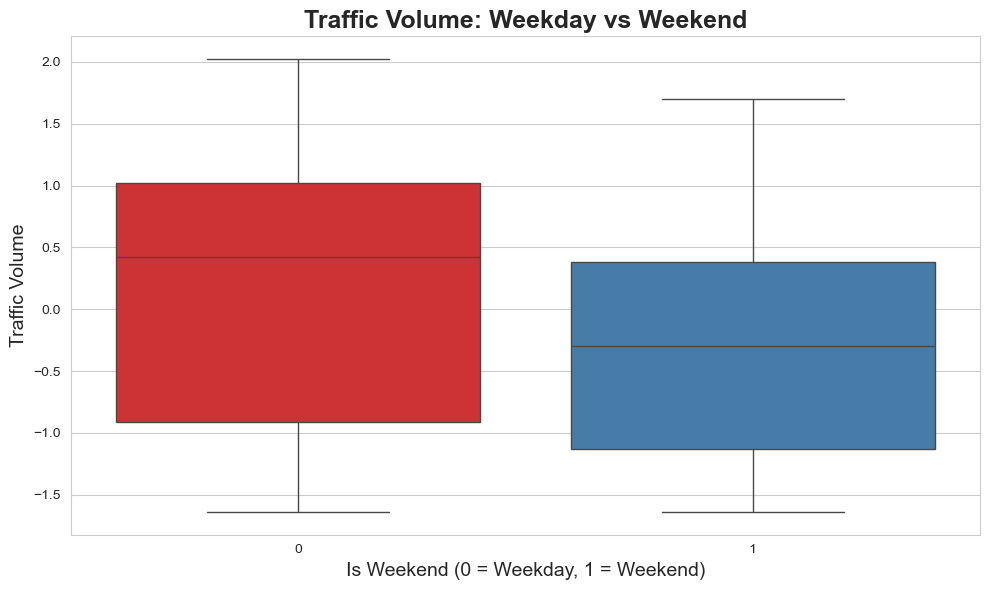

In [20]:
# 7. Traffic volume comparison on weekdays vs weekends
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # Define weekend as Saturday (5) and Sunday (6)
plt.figure(figsize=(10,6))
sns.boxplot(x='is_weekend', y='traffic_volume', data=df, palette='Set1')
plt.title('Traffic Volume: Weekday vs Weekend', fontsize=18, fontweight='bold')
plt.xlabel('Is Weekend (0 = Weekday, 1 = Weekend)', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.tight_layout()
plt.show()

#### <i>===== Modeling ===== </i>

In [21]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Check if 'date_time' column exists before dropping it
if 'date_time' in df.columns:
    df = df.drop(['date_time'], axis=1)

# Handle categorical variables with one-hot encoding
df = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)

# Define features and target
X = df.drop(['traffic_volume'], axis=1)
y = df['traffic_volume']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for the models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize and train models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
linear_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Make predictions
y_pred_lr = linear_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [26]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display performance metrics
print(f"Linear Regression MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Linear Regression MSE: 0.80, R²: 0.20
Random Forest MSE: 0.04, R²: 0.96


#### <i> ===== Results Of Prediction ===== </i>

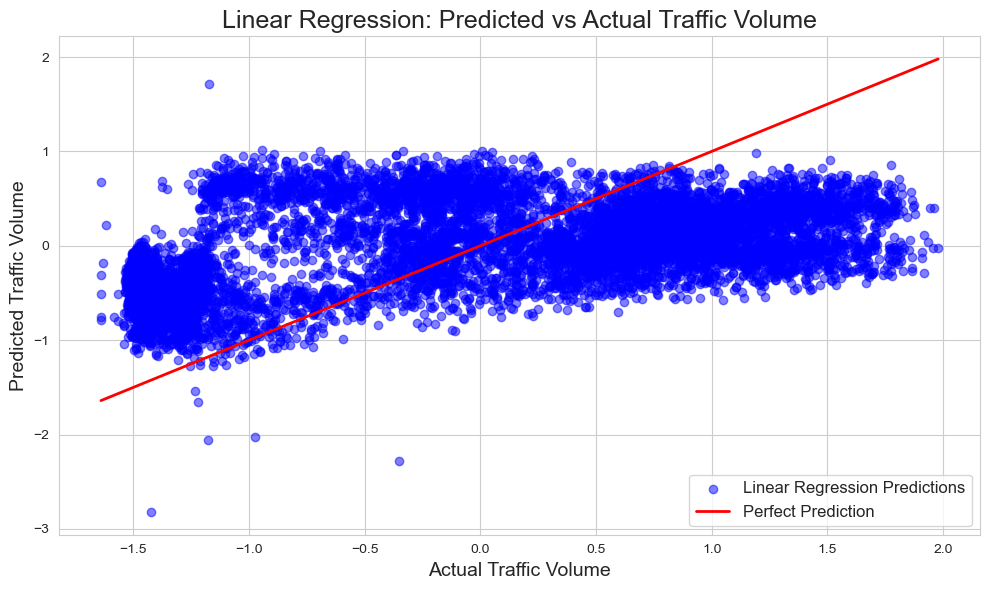

In [27]:
# 1. Visualization: Predicted vs Actual Traffic Volume (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Linear Regression: Predicted vs Actual Traffic Volume', fontsize=18)
plt.xlabel('Actual Traffic Volume', fontsize=14)
plt.ylabel('Predicted Traffic Volume', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

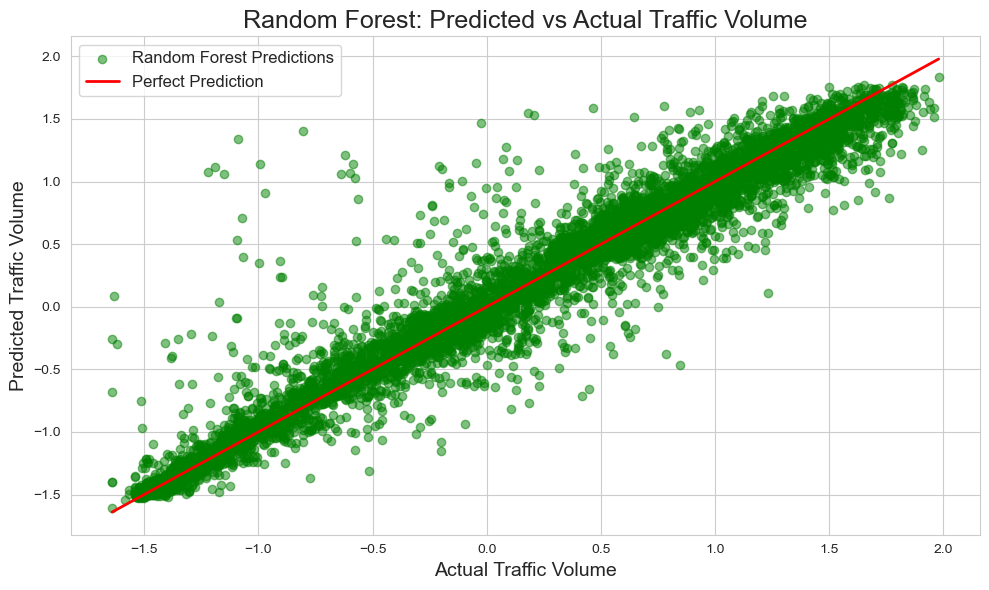

In [28]:
# 2. Visualization: Predicted vs Actual Traffic Volume (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Random Forest: Predicted vs Actual Traffic Volume', fontsize=18)
plt.xlabel('Actual Traffic Volume', fontsize=14)
plt.ylabel('Predicted Traffic Volume', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

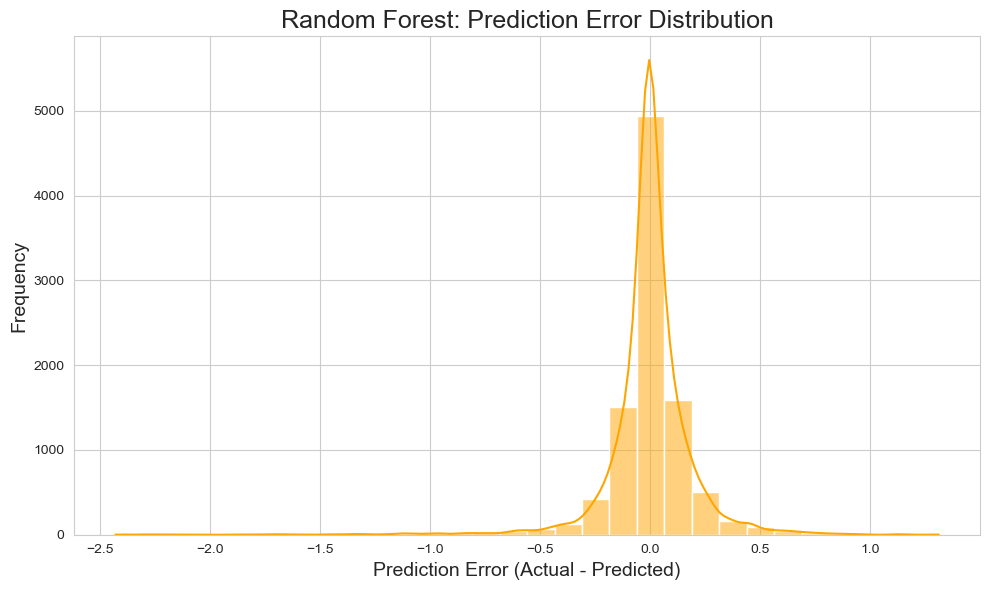

In [29]:
# 3. Error distribution for Random Forest Model
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_rf, bins=30, color='orange', kde=True)
plt.title('Random Forest: Prediction Error Distribution', fontsize=18)
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### <i> ===== Actual vs Prediction Traffic Volume ===== </i> 

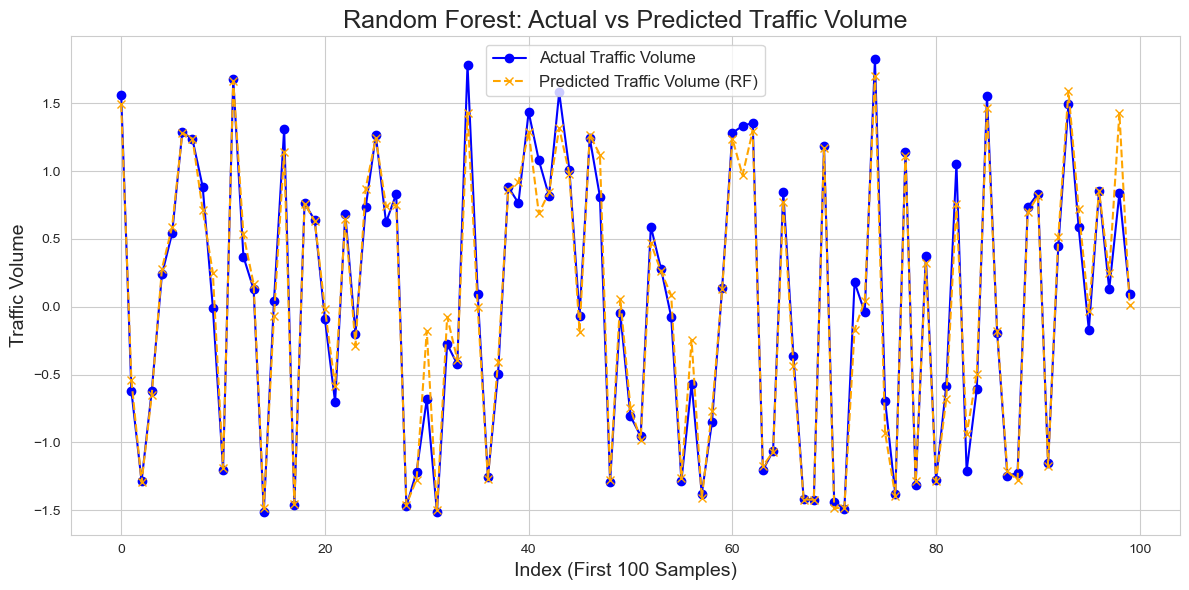

In [30]:
# Let's visualize the first 100 data points for clarity
plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), y_test[:100], color='blue', label='Actual Traffic Volume', marker='o')
plt.plot(np.arange(100), y_pred_rf[:100], color='orange', linestyle='--', label='Predicted Traffic Volume (RF)', marker='x')

plt.title('Random Forest: Actual vs Predicted Traffic Volume', fontsize=18)
plt.xlabel('Index (First 100 Samples)', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

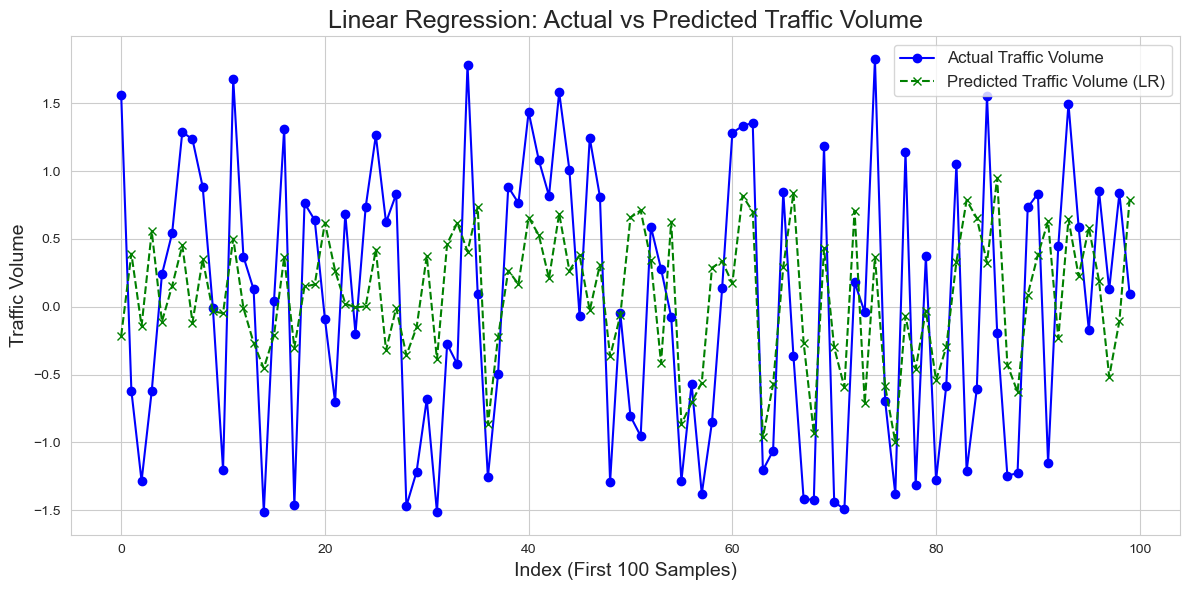

In [31]:
# 6. Visualization: Actual vs. Predicted Traffic Volume (for Linear Regression)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), y_test[:100], color='blue', label='Actual Traffic Volume', marker='o')
plt.plot(np.arange(100), y_pred_lr[:100], color='green', linestyle='--', label='Predicted Traffic Volume (LR)', marker='x')

plt.title('Linear Regression: Actual vs Predicted Traffic Volume', fontsize=18)
plt.xlabel('Index (First 100 Samples)', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()